In [18]:
from collections import Counter
import seaborn as sns

# Plotting cell
from matplotlib import pyplot as plt

# font
plt.rcParams.update({'font.size': 8})

# reset the default figsize value
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# 144 is good for a high-resolution display. Try 100 if it's too big
plt.rcParams["figure.dpi"] = (144)

In [19]:
import statistics as stats

In [20]:
def printInfo(dv):
  print(f"Length: {len(dv)}")
  print(f"Minimum: {min(dv)}")
  print(f"Maximum: {max(dv)}")
  print(f"Mean: {stats.mean(dv)}")
  print(f"16%,50%,84% Percentile values: {stats.quantile(dv,0.16)},{stats.quantile(dv,0.50)},{stats.quantile(dv,0.84)}")
  print(f"Median: {stats.median(dv)}")
  print(f"Std Deviation: {stats.standard_deviation(dv)}")
  print(f"Interquartile Range: {stats.interquartile_range(dv)}")

In [21]:
import csv
gamma = []
with open("gamma.csv") as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        gamma.append(float(row[0]))
        
printInfo(gamma)

Length: 1000
Minimum: 0.07609191985691709
Maximum: 9.95054358415928
Mean: 1.9321904949508906
16%,50%,84% Percentile values: 0.6470909280431079,1.615562777509157,3.1651099383996906
Median: 1.6153095369762664
Std Deviation: 1.3840773901336623
Interquartile Range: 1.7365660245071104


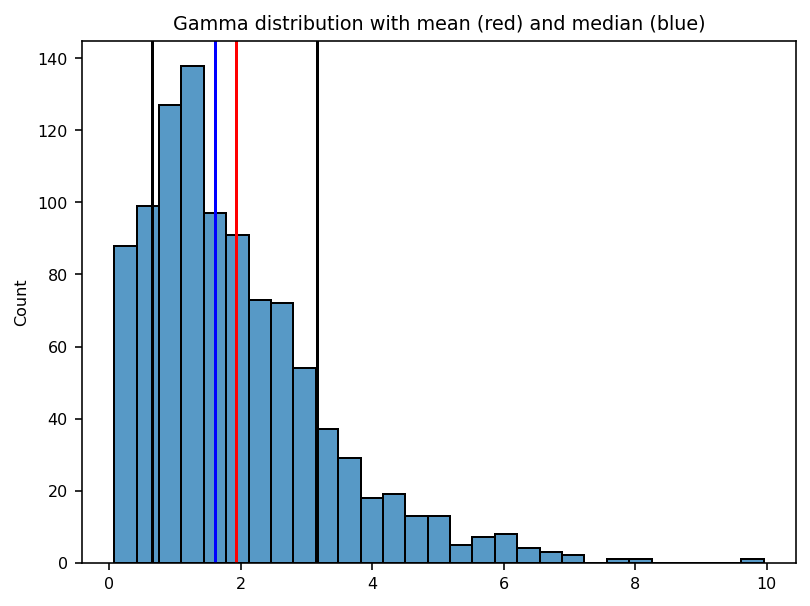

In [22]:
sns.histplot(x=gamma)
plt.axvline(x=stats.mean(gamma),color='red')
plt.axvline(x=stats.median(gamma),color='blue')

plt.axvline(x=stats.quantile(gamma,0.16),color='black')
plt.axvline(x=stats.quantile(gamma,0.84),color='black')
plt.axvline(x=stats.median(gamma),color='blue')

plt.title(f"Gamma distribution with mean (red) and median (blue)")
plt.show()

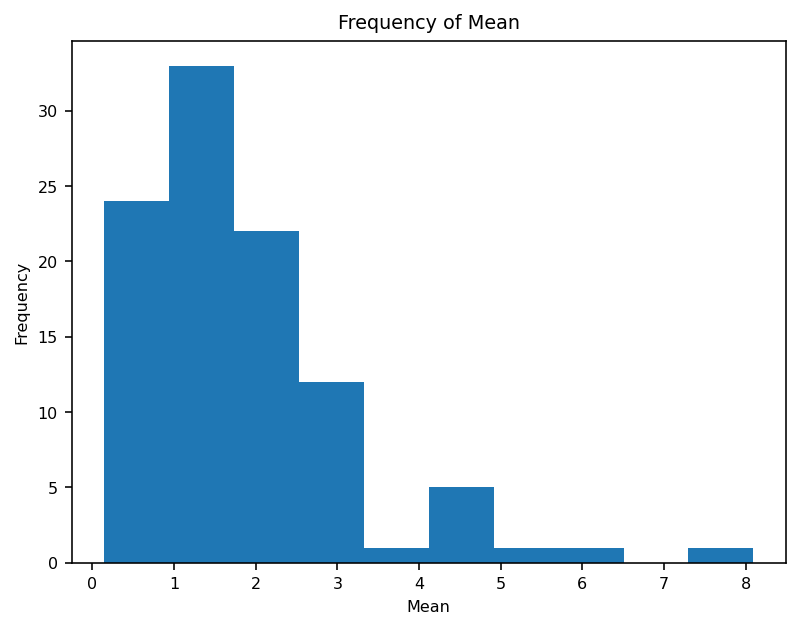

In [23]:
import random
def centralLimit(somedata):
  # select 100 values using random.sample() function 
  sample_100 = random.sample(somedata, 100)
  # stats.mean(sample_100)

  # use for loop to simulate this process 10,000 times
  # store each mean into an array called means_size_100
  means_size_100 = []
  sums_size_100 = []
  for _ in range(10000):
      sample_size_100 = random.sample(somedata, 100)
      means_size_100.append(stats.mean(sample_size_100))
      sums_size_100.append(sum(sample_size_100))
  return sample_100,means_size_100,sums_size_100

sample_100,means_size_100,sums_size_100 = centralLimit(gamma)

# plot histogram of 100 samples
plt.hist(sample_100)
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.title('Frequency of Mean');

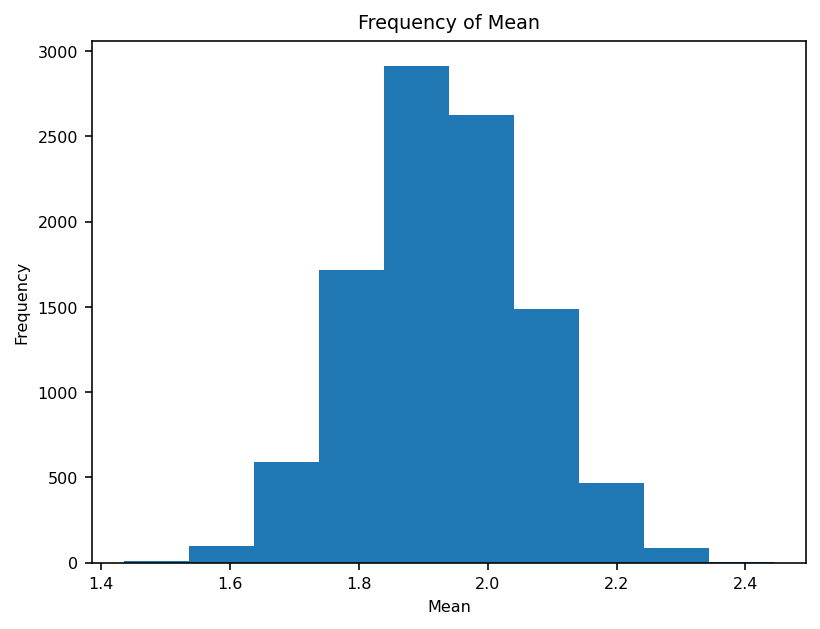

In [24]:
plt.hist(means_size_100)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Frequency of Mean');

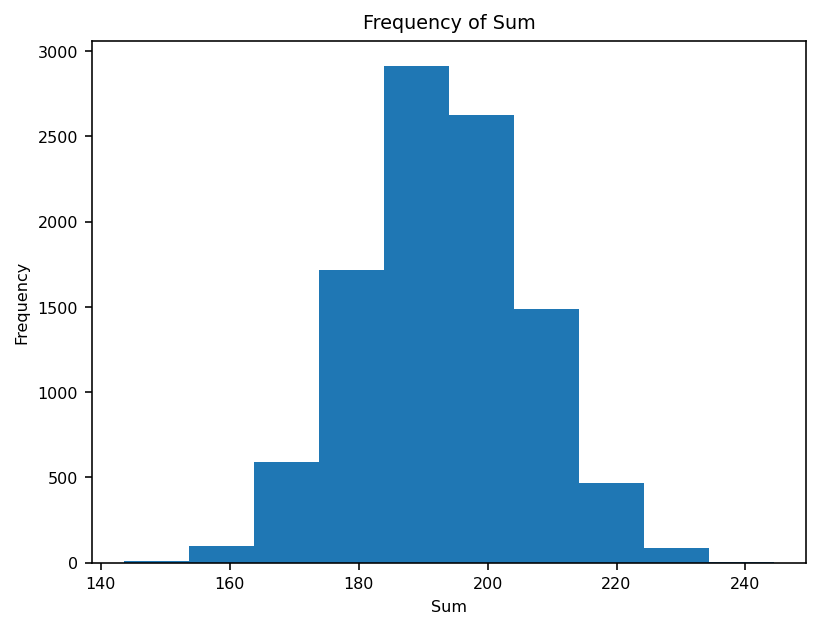

In [25]:
plt.hist(sums_size_100)
plt.xlabel('Sum')
plt.ylabel('Frequency')
plt.title('Frequency of Sum');

In [26]:
printInfo(means_size_100)

Length: 10000
Minimum: 1.4364492157426292
Maximum: 2.443761498160442
Mean: 1.9316613412515187
16%,50%,84% Percentile values: 1.8031015215949386,1.9281487340916348,2.0610939868727254
Median: 1.9281215591461942
Std Deviation: 0.13037897606709573
Interquartile Range: 0.17797302693881867


In [27]:
printInfo(sums_size_100)

Length: 10000
Minimum: 143.64492157426292
Maximum: 244.3761498160442
Mean: 193.16613412515213
16%,50%,84% Percentile values: 180.31015215949387,192.81487340916348,206.10939868727255
Median: 192.81215591461944
Std Deviation: 13.037897606709523
Interquartile Range: 17.797302693881875


<class 'numpy.ndarray'>
(299, 400)
<class 'PIL.Image.Image'>
L
(400, 299)


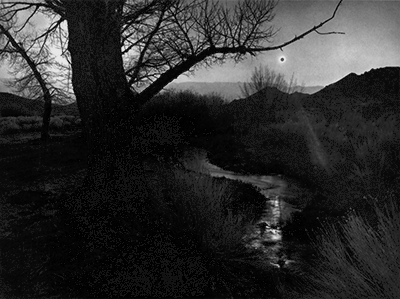

In [28]:
from PIL import Image
from numpy import asarray, savetxt
#load the image
image = Image.open('anselAdams_blackSun_400x299_inverted.gif')
#convert image to numpy array
data = asarray(image)
print(type(data))
#summarize shape
print(data.shape)

flat = data.flatten()

savetxt('anselAdams_blackSun.csv', data)

#create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

#summarize image details
print(image2.mode)
print(image2.size)
image2

In [29]:
printInfo(flat)

Length: 119600
Minimum: 0
Maximum: 231
Mean: 44.38982441471572
16%,50%,84% Percentile values: 5,23,107
Median: 23.0
Std Deviation: 54.05626220963892
Interquartile Range: 43


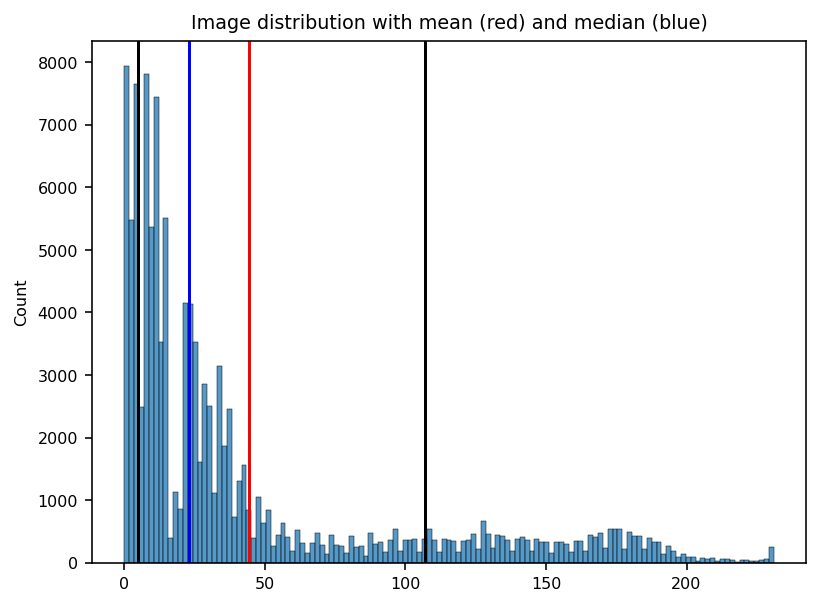

In [30]:
sns.histplot(x=flat)
plt.axvline(x=stats.mean(flat),color='red')
plt.axvline(x=stats.quantile(flat,0.16),color='black')
plt.axvline(x=stats.quantile(flat,0.84),color='black')
plt.axvline(x=stats.median(flat),color='blue')
plt.title(f"Image distribution with mean (red) and median (blue)")
plt.show()